# Projet Python : Propagation de messages: variables binaires sur un arbre d’interaction

In [1]:
#importation des bibliothèques utiles au projet
import networkx as nx
import random
import numpy as np
import math
import numpy.random as npr
import matplotlib.pyplot as plt
import time

**S1.** Écrire une fonction qui génère un arbre de manière récursive en partant de la racine avec une
profondeur maximale fixée. On utilisera deux manières de choisir le nombre d’enfants pour chaque
nouveau noeud: (1) constant égale à d (arbre régulier), (2) en tirant une variable aléatoire d’une loi de
Poisson de paramètre d (cf numpy.random.poisson). En guise de vérification, tracer un arbre avec
nombre d’enfants constant et un avec loi Poissonienne, avec une profondeur maximale égale à 3 et
d = 3 (cf networkx.draw).

Pour répondre à cette question, nous avons écrit quatres fonctions, dans chacun des deux cas (régulier ou avec une loi de Poisson), il y a un fonction créant un graphe normal et une fonction créant un graphe dirigé.

In [2]:
def generateRegularDiTree(d,n):
    DG = nx.DiGraph() #on crée le graphe
    DG.add_node(0) # on lui ajoute le premier noeud, la racine
    DG.nodes[0]['feuille']= False #différentie les feuilles des autres noeuds, cela sert dans la suite pour les conditions au bords
    DG.nodes[0]['weight']= 1 # valeur du noeud
    def auxgenerateRegularTree(n, i, j):
        """
        Entrée :
        n : un entier représentant la génération du graphe a créee en partant du noeud j
        j : un entier représentant le noeud parent
        i : un entier représentant le nombre de noeuds dans l'arbre
        Résultat : 
        Le graphe DG est modifié en ajoutant un arbre de profondeur n au noeud j
        Renvoie le nombre de noeuds créee par l'appel de la fonction
        """
        r = i # on garde en mémoire le nombre de noeuds dans l'arbre au début de l'appel
        if n>2 : # on ne crée pas encore les feuilles
            for k in range(0,d): # on va attacher d noeuds au noeud j
                DG.add_node(i+k)
                DG.nodes[i+k]['weight']= 1
                DG.nodes[i+k]['feuille']= False
                DG.add_edge(j, i+k)
            i = i + d
            for k in range(0, d): 
                i = i + auxgenerateRegularTree(n-1, i , r+k) # on ré-applique la fonction à chacun des noeuds crée 
                                                             # en mettant à jour le nombre de noeuds dans l'arbre
                
        if n == 2:
            for k in range(0, d): # on crée les feuilles de l'arbre pour la dernier génération
                DG.add_node(i+k)
                DG.nodes[i+k]['weight']= 1
                DG.nodes[i+k]['feuille']= True
                DG.add_edge(j, i+k)
            i = i+d
        return(i-r) # nombre de noeuds crée par l'appel de la fonction récursive auxilliaire
    auxgenerateRegularTree(n, 1, 0)
    return(DG)
        

In [3]:
def generateRegularTree(d,n):
    G = nx.Graph()
    G.add_node(0)
    G.nodes[0]['feuille']= False
    G.nodes[0]['weight']= 1
    def auxgenerateRegularTree(n, i, j):
        r = i
        if n>2 :
            for k in range(0,d):
                G.add_node(i+k)
                G.nodes[i+k]['weight']= 0
                G.nodes[i+k]['feuille']= False
                G.add_edge(i+k,j)
            i = i + d
            for k in range(0, d):
                i = i + auxgenerateRegularTree(n-1, i , r+k)
                
        if n == 2:
            for k in range(0, d):
                G.add_node(i+k)
                G.nodes[i+k]['weight']= 1
                G.nodes[i+k]['feuille']= True
                G.add_edge(i+k,j)
            i = i+d
        return(i-r)
    auxgenerateRegularTree(n, 1, 0)
    return(G)

In [4]:
def generateRandomTree(d,n):
    G = nx.Graph()
    G.add_node(0)
    G.nodes[0]['feuille']= False
    G.nodes[0]['weight']= 1
    def auxgenerateRandomTree(n, i, j):
        p = np.random.poisson(d,1)[0]
        if p ==0:
            G.nodes[j]['feuille']= True
        r = i
        if n>2 :
            for k in range(0,p):
                G.add_node(i+k)
                G.nodes[i+k]['weight']= 1
                G.nodes[i+k]['feuille']= False
                G.add_edge(i+k,j)
            i = i + p
            for k in range(0, p):
                i = i + auxgenerateRandomTree(n-1, i , r + k)
        if n == 2:
            for k in range(0, p):
                G.add_node(i+k)
                G.nodes[i+k]['weight']= 1
                G.nodes[i+k]['feuille']= True
                G.add_edge(i+k,j)
            i = i + p
        return(i-r)
    auxgenerateRandomTree(n, 1, 0)
    return(G)

In [5]:
def generateRandomDiTree(d,n):
    DG = nx.DiGraph()
    DG.add_node(0)
    DG.nodes[0]['feuille']= False
    DG.nodes[0]['weight']= 1
    def auxgenerateRandomTree(n, i, j):
        p = np.random.poisson(d,1)[0]
        if p ==0:
            DG.nodes[j]['feuille']= True
        r = i
        if n>2 :
            for k in range(0,p):
                DG.add_node(i+k)
                DG.nodes[i+k]['weight']= 1
                DG.nodes[i+k]['feuille']= False
                DG.add_edge(j, i+k)
            i = i + p
            for k in range(0, p):
                i = i + auxgenerateRandomTree(n-1, i , r + k)
        if n == 2:
            for k in range(0, p):
                DG.add_node(i+k)
                DG.nodes[i+k]['weight']= 1
                DG.nodes[i+k]['feuille']= True
                DG.add_edge(j, i+k)
            i = i + p
        return(i-r)
    auxgenerateRandomTree(n, 1, 0)
    return(DG)

Dans les deux cellules qui suivent, on teste les fonctions générant les arbres réguliers et suivant un loi poissonienne non dirigés.

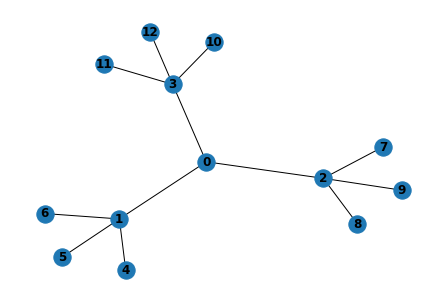

In [6]:
GS1_test1 = generateRegularTree(3,3)
nx.draw(GS1_test1,with_labels=True,  font_weight='bold')

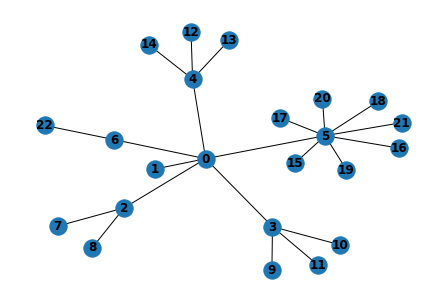

In [7]:
GS1_test2 = generateRandomTree(3,3)
nx.draw(GS1_test2,with_labels=True,  font_weight='bold')

**T1.** Le calcul de $Z_j$ , sans hypothèse particulière sur la structure de l’arbre, doit passer par la sommation
sur toutes les valeurs possibles de x $\in \Omega$. Combien de termes cette somme comporte-t-elle ? Est-il
réaliste d’effectuer ce calcul pour N de l’ordre de la centaine ? 

On sait que $\Omega$ = $\{-1,1\}^N$. Ainsi, la some comporte le même nombre d'élèments que $\Omega$, c'est à dire comporte $2^N$ éléments. Pour N de l'ordre de la centaine cela représente $2^{100}$ termes soit environ $10^{30}$ élèments, ce n'est donc pas réaliste d'effectuer ce calcul.

**T2.** Calculer la loi de probabilité conditionnelle d’une coordonnée Xi étant donné l’ensemble des
autres coordonnées noté $X_{\backslash i}$ = $x_{i}$ $\in \{-1,1\}^N$. En particulier, montrer que cette loi dépend des
autres coordonnées uniquement via  $ h_{i} =  \sum_{j/(i,j) \in E} x_j$
(sommation sur tous les indices j tel qu’il existe un lien entre i et j dans l’arbre). Remarquez qu’il est
possible de calculer explicitement la constante de normalisation de cette loi.

**T2.** Soit $i_0 \in \Omega$. D'après la formule des probabilités conditionnelles et la formule des probabilités totales; $$ P(X_{i_0} =1 | X_{\backslash {i_0}}) = \frac{P(X_{i_0} = 1 \bigcap X_{\backslash i_0})}{ P(X_{\backslash i_0})}\\ $$$$ = \frac{\frac{1}{Z_j}\exp(J\sum\limits_{\underset{i \neq i_0,j \neq i_0 }{(i,j) \in E}}{x_ix_j} \ + \ J \sum_{j/(i_0,j) \in E} x_j)}{\frac{1}{Z_j}\exp(J\sum\limits_{\underset{i \neq i_0,j \neq i_0 }{(i,j) \in E}}{x_ix_j} \ + \ J \sum_{j/(i_0,j) \in E} x_j) + \frac{1}{Z_j}\exp(J\sum\limits_{\underset{i \neq i_0,j \neq i_0 }{(i,j) \in E}}{x_ix_j} \ - \ J \sum_{j/(i_0,j) \in E} x_j)}\\ $$ On reconnait $h_{i_0}$ : $$ P(X_{i_0} =1 | X_{\backslash {i_0}}) = \frac{exp(Jh_{i_0})}{exp(Jh_{i_0}) + exp(-Jh_{i_0})} $$
En outre,
$$ P(X_{i_0} =1 | X_{\backslash {i_0}}) = \frac{exp(Jh_{i_0})}{Z_{\backslash i_0}}$$
Avec :
$$ Z_{\backslash i_0} = exp(Jh_{i_0}) + exp(-Jh_{i_0}) = P(X_{i_0} =1 | X_{\backslash {i_0}}) + P(X_{i_0} = -1 | X_{\backslash {i_0}})$$ 

la constante de renormalisation de cette loi.

**S2.** Écrire une fonction qui implémente l’algorithme de Gibbs pour échantillonner (22.1) avec la condition
au bord que l’on s’est fixé. Pour tester votre algorithme, considérer un arbre régulier de profondeur
3 et avec d = 3. Remarquer que tous les noeuds d’une même génération sont équivalents dans la loi
jointe. Montrer qu’en régime stationnaire leurs espérances marginales sont bien les mêmes. Utiliser
J = 0.1 pour vos expérimentations.
Indication: Pour la représentation de la vérification, vous pourrez par exemple utiliser l’argument optionnel
node_color de nx.draw pour relier la couleur des noeuds aux estimations des espérances.

In [8]:
def echantillonageGibbs(G, t, J):
    """
    Entrée : 
    G : un graphe
    t : un entier représentant le nombre d'itération de l'algorithme de Gibbs
    J : paramètre aggisant dans la loi conditionnelle
    Résultat :
    Le graphe G échantillionné par l'algorithme de Gibbs
    """
    N = G.number_of_nodes();
    espace_etat = [1,-1] # les valeurs possibles qu'on peut affecter aux noeuds
    for k in range (t): # on répete l'algorithme t fois
        i = random.randint(0, N-1); # étape 1 : on tire un noeud au hasard uniformément
        if (G.nodes[i]['feuille']==False): # si c'est une feuille on ne fait rien et on recommence
            L = list(G[i]) # liste des voisins de i
            S = 0
            P = 0
            for l in L:
                S += G.nodes[l]['weight'] # on calcule hj avec les voisins de i dans l'arbre
            P = math.exp(J*S)/(math.exp(J*S) + math.exp(-J*S))
            probas = [P, 1-P]
            x = echantillon = npr.choice(espace_etat, p =probas, size=1)[0] # étape 2 :on tire selon la loi conditionelle 
            G.nodes[i]['weight'] = x # etape 3 : on met a jour le noeud
    return(G)
    

Nous avons montré que les noeuds d'une même génération était bien équivalents en approchant les espérances marginales des noeuds par une estimation empirique la moyenne des noeuds sur un grand nombre d'échantillonage.

In [9]:
GS2_test1 = echantillonageGibbs(generateRegularTree(3,3),40,0.1)

In [10]:
# on échantillone le graphe un grand nombre de fois pour calculer la moyenne empirique de la valeur de chaque noeuds
# d'après la loi forte des grands nombres, cette moyenne converge vers l'espérance marginales des noeuds en régime stationnaire
NS2_test1 = GS2_test1.number_of_nodes()
LS2_test1 = [0 for l in range(NS2_test1)]
for k in range(10000):
    GS2_test1 = echantillonageGibbs(GS2_test1,40,0.1)
    for i in range(NS2_test1):
        LS2_test1[i]+= GS2_test1.nodes[i]['weight']
for i in range(NS2_test1):
        GS2_test1.nodes[i]['weight'] = LS2_test1[i]/10000

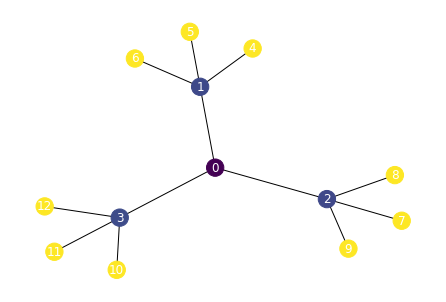

In [11]:
values = [GS2_test1.nodes[i]['weight'] for i in range(GS2_test1.number_of_nodes())] # on modifie la couleur des noeuds selon la valeur 
                                                                                    # de leur espérance marginale
nx.draw(GS2_test1, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')

**T3.** Combien d’itérations sont nécessaires en moyenne avant d’avoir mis à jour une fois chaque coordonnée
du vecteur aléatoire avec l’algorithme de Gibbs ? Afin d’éviter d’obtenir des échantillons trop
corrélés, on attendra ce nombre d’itérations entre chaque prélèvement d’échantillon x(t) pour le calcul
ultérieur d’espérances.

**T3.**
On pose T  le temps d'attente pour avoir mis à jour tous les points de l'arbre.
$ T_k $ le temps pour mettre à jour un nouvel élément sachant qu'on en a déja mis à jour k.
$ T_k $ suit une loin géométrique de paramètre de succès $\frac{n}{n-k}$ (nombre d'éléments restants à mettre à jour sur nombre d'éléments total).
On a donc par linéarité de l'espérance :
$$
 T =  T_0 + T_1 + T_2 + ... + T_{n-1}
$$
$$
T = \sum_{k=0}^{n-1} E(T_k)
$$
$$
T = \sum_{k=0}^{n-1} \frac{n}{n-k}
$$
$$
T = n \sum_{k=1}^{n} \frac{1}{k}
$$
Et donc,
$$
T \underset{ n\to\infty}= nlog(n) + o(nlog(n))
$$

En moyenne il faut donc $Nlog(N)$ pour mettre à jour tous les noeuds de l'arbre, où N est le nombre total de noeuds.

**T4.** Montrer que pour l’échantillonnage de (22.1) on peut alors définir une partition en deux groupes
des noeuds telle que, dans chacun des groupes, tous les peuvent être mis à jour simultanément.

On remarque que la loi conditionnelle du noeuds $x_i$ dépend uniquement du paramètre $h_i$ qui ne dépend lui même que des voisins du noeud $x_i$ dans l'arbre. Or les seuls voisins de $x_i$ sonnt ses noeuds enfants et son noeud parent. Il ne possède donc des voisins au plus que dans les génération directement au dessus et directement en dessous. Ainsi, sa loi conditionelle ne dépend pas des autres noeuds de la même génération ni dans les générations autres que cités précédement. Comme on peut tirer les numéros dans un ordre déterministes pour échantilloner l'arbre on en déduit que l'on peut partitionner l'arbre selon la partié de la génération de chaque noeud. On peut ainsi mettre à jour tout les noeuds de génération paires en même temps puis tout les noeuds de génération impaire en même temps.

**S3.** Écrire une nouvelle fonction qui implémente une variante de l’algorithme de Gibbs exploitant cette
observation, et procéder à la même vérification qu’à la question S2.

On procède en plusieurs étapes pour cette question, on défnit d'abord un fonction qui partitionne l'arbre en deux groupes commme définis à la question précedente. Ensuite, on exploite la remarque de la question T4 pour mettre à jour simultanément tout les noeuds du même groupe. On effectue ensuite la même vérification qu'en S2.

In [12]:
def partitionner(G):
    """
    Entrée :
    Graphe G
    Résulat :
    L : liste contenant tout les noeuds de générations paires (la racine est de génération 0)
    L : liste contenant tout les noeuds de générations impaires 
    """
    L = [0]
    T = []
    def auxPartitionner(n, k):
        if (G.nodes[n]['feuille']==False): # on arrete lorsque l'on tombe sur une feuille
            if k == 0 : # genération paire
                for l in list(G[n]): 
                    if l not in L and G.nodes[l]['feuille']==False: # on ne prends que les noeuds enfants
                        L.append(l) # on l'ajoute à la liste
                        auxPartitionner(l,1) # on part de ce nouveau noeuds on ajoutant ses fils aux générations impaires
                    
            else:
                for l in list(G[n]):
                    if l not in T and G.nodes[l]['feuille']==False:
                        T.append(l)
                        auxPartitionner(l,0)
    auxPartitionner(0,1)
    return(L,T)

In [13]:
def echantillonageGibbsBis(G, J, L, T):
    """
    Entrée : 
    G : un graphe
    t : un entier représentant le nombre d'itération de l'algorithme de Gibbs
    J : paramètre aggisant dans la loi conditionnelle
    Résultat :
    Le graphe G échantillionné par l'algorithme de Gibbs
    """
    espace_etat = [1,-1]
    for i in L: # on met à jour tout les noeuds simultanément
        S = 0
        P = 0
        for l in list(G[i]): 
            S += G.nodes[l]['weight']
        P = math.exp(J*S)/(math.exp(J*S) + math.exp(-J*S))
        probas = [P, 1-P]
        x = echantillon = npr.choice(espace_etat, p =probas, size=1)[0]
        G.nodes[i]['weight'] = x
    for i in T:
        S = 0
        P = 0
        for l in list(G[i]):
            S += G.nodes[l]['weight']
        P = math.exp(J*S)/(math.exp(J*S) + math.exp(-J*S))
        probas = [P, 1-P]
        x = echantillon = npr.choice(espace_etat, p =probas, size=1)[0]
        G.nodes[i]['weight'] = x
            
    return(G)

In [14]:
GS3_test1 = generateRegularTree(3,3)
LS3_test1,TS3_test1 = partitionner(GS3_test1) 

In [15]:
GS3_test1 = echantillonageGibbsBis(GS3_test1,0.1,LS3_test1,TS3_test1)

In [16]:
NS3_test1 = GS3_test1.number_of_nodes()
ES3_test1 = [0 for l in range(NS3_test1)]
for k in range(1000):
    GS3_test1 = echantillonageGibbsBis(GS3_test1,0.1,LS3_test1,TS3_test1)
    for i in range(NS3_test1):
        ES3_test1[i]+= GS3_test1.nodes[i]['weight']
for i in range(NS3_test1):
        GS3_test1.nodes[i]['weight'] = ES3_test1[i]/1000

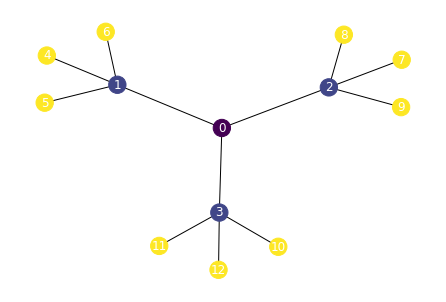

In [17]:
values = [GS3_test1.nodes[i]['weight'] for i in range(NS3_test1)]
nx.draw(GS3_test1, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')

**T5.**
On part de la relation initiale :
$$
m_{i \to j}(x_i)= \frac{1}{Z_{i \to j}}\sum\limits_{ \left\{x_k\right\}_k \in \left\{-1,1\right\}^{d_i-1}}{exp(J\sum\limits_{\underset{k \neq j}{k/(i,k) \in E}}{x_ix_k})\prod\limits_{\underset{k \neq j}{k/(i,k) \in E}} m_{k \to j}(x_k)}
$$
On remarque qu'on peut la réecrire comme suit :
$$
m_{i \to j}(x_i)= \frac{1}{Z_{i \to j}}\sum\limits_{ \left\{x_k\right\}_k \in \left\{-1,1\right\}^{d_i-1}}{\prod\limits_{\underset{k \neq j}{k/(i,k) \in E}} e^{Jx_ix_k}m_{k \to j}(x_k)}
$$
Pour la dernière égalité, lorsqu'on calcule le produit de $d_i -1$ termes formés par la somme de deux éléments, cela revient (en développant) à sommer sur tous les  $(d_i -1)$-uplets à valeurs dans le produit cartésien des deux indices des éléments de la somme de chaque terme du produit. 
$$
m_{i \to j}(x_i)= \frac{1}{Z_{i \to j}}{\prod\limits_{\underset{k \neq j}{k/(i,k) \in E}}{\Bigg(\sum\limits_{ x_k \in \left\{-1,1\right\}} e^{Jx_ix_k}m_{k \to j}(x_k)\Bigg)}}
$$
Par ailleurs, on peut réecrire l'expression suivante :
$$
m_{i \to j}(x_i)= \frac{1}{Z_{i \to j}}{\prod\limits_{\underset{k \neq j}{k/(i,k) \in E}}{\Bigg(\sum\limits_{ x_k \in \left\{-1,1\right\}} e^{Jx_ix_k}m_{k \to j}(x_k)\Bigg)}}
$$
en

$$
m_{i \to j}(x_i)= \frac{1}{Z_{i \to j}}{\prod\limits_{\underset{k \neq j}{k/(i,k) \in E}}{\Bigg(e^{Jx_i}m_{k \to j}(+1) + e^{-Jx_i}m_{k \to j}(-1)\Bigg)}}
$$
Or, $m_{k \to j}(-1) = 1 - m_{k \to j}(+1)$ 

Donc,
$$
m_{i \to j}(x_i)= \frac{1}{Z_{i \to j}}{\prod\limits_{\underset{k \neq j}{k/(i,k) \in E}}{\Bigg(e^{-Jx_i} + e^{Jx_i}m_{k \to j}(+1) + e^{-Jx_i}m_{k \to j}(+1)\Bigg)}}
$$
$$
m_{i \to j}(x_i)= \frac{1}{Z_{i \to j}}{\prod\limits_{\underset{k \neq j}{k/(i,k) \in E}}{\Bigg(e^{-Jx_i} + 2m_{k \to j}(+1)\sinh(Jx_i)\Bigg)}}
$$

De plus,
$$
m_{i \to j}(1) + m_{i \to j}(-1) = 1$$
D'ou,
$$
Z_{i \to j}= M_{i \to j}(+1) + M_{i \to j}(-1)
$$
Où 
$$
M_{i \to j}(x_i) = \prod\limits_{\underset{k \neq j}{k/(i,k) \in E}}{\Bigg(e^{-Jx_i} + 2m_{k \to j}(+1)\sinh(Jx_i)\Bigg)}
$$

Finalement, 

$$
m_{i \to j}(x_i)= \frac{M_{i \to j}(x_i)}{M_{i \to j}(+1) + M_{i \to j}(-1)}
$$

**S4.** Implémentez l’algorithme de passage de message qui calcule tous les messages de l’arbre. On
procédera en partant des feuilles jusqu’à la racine, puis de la racine jusqu’aux feuilles. On se souviendra
qu’une loi de probabilité sur une variable binaire est paramétrisée par un unique scalaire.

Tout d'abord, on ecrit une fonction qui renvoie la liste des feuilles de l'arbre qui servira de point de départ.

In [18]:
def liste_feuille(G):
    """
    Entrée :
    Graphe G
    Résultat :
    liste des noeuds correspondant à des feuilles
    """
    F = []
    N = G.number_of_nodes()
    for i in range(N):
        if (G.nodes[i]['feuille']):
            F.append(i)
    return(F)

Les deux fonctions qui suivent permettent de se déplacer facilement dans l'arbre.

In [19]:
def liste_successors(G,n):
    """
    Entrée : 
    Graphe G
    n : un entier représentant un noeud
    Résultat :
    S : liste des enfants du noeuds n
    """
    S =[]
    iterator = G.successors(n)
    while True:
        try:
            element = next(iterator)
            S.append(element)
        except StopIteration:
            break
    return(S)

In [20]:
def liste_predecessors(G,n):
    """
    Entrée : 
    Graphe G
    n : un entier représentant un noeud
    Résultat :
    P : liste des parents du noeuds n
    """
    P =[]
    iterator = G.predecessors(n)
    while True:
        try:
            element = next(iterator)
            P.append(element)
        except StopIteration:
            break
    return(P)

La fonction suivante part des feuilles et remonte vers la racine en calculant tout les messages de bas vers le haut.

In [21]:
def passage_de_message_up(G,J):
    """
    Entrée :
    Graphe G
    J : un float représentant un paramètre des lois de passage de message
    Résultat :
    MUP : tableau numpy représentant la loi des messages des enfants vers les parents,
    MUP[i][j] : probabilté que le message de i vers j soit égale à 1, le cas -1 s'en déduit
    """
    N = G.number_of_nodes()
    MUP = np.zeros((N,N))
    F = liste_feuille(G)
    for i in F: # on part des feuilles
        j = liste_predecessors(G,i)[0] 
        MUP[i][j] = 1 # condition aux bords
        i=j
        while (liste_predecessors(G,i)!=[]):
            j = liste_predecessors(G,i)[0] 
            m_plus = 1
            m_moins = 1
            for k in liste_successors(G,i):
                m_plus = m_plus*(math.exp(-J)+2*math.sinh(J)*MUP[k][i])
                m_moins = m_moins*(math.exp(J)+2*math.sinh(-J)*MUP[k][i])
            MUP[i][j]= m_plus/(m_plus + m_moins)
            i=j # on remonte vers son noeud parent
    return(MUP)
            

Ensuite, cette fonction part de la racine et calcule récursivement les messages de haut vers la bas

In [22]:
def passage_de_message(G,J):
    """
    Entrée :
    Graphe G
    J : un float représentant un paramètre des lois de passage de message
    Résultat :
    MUP : tableau numpy représentant la loi de tout les messages de l'arbre,
    MUP[i][j] : probabilté que le message de i vers j soit égale à 1, le cas -1 s'en déduit
    """
    MUP = passage_de_message_up(G,J)
    def aux_passage_de_message_down(G,i):
        if liste_successors(G,i) != []:
            P = liste_successors(G,i) 
            for j in P: # on choisit un des noeuds enfants
                m_plus = 1
                m_moins = 1
                for k in P:
                    if k!=j:
                        m_plus = m_plus*(math.exp(-J)+2*math.sinh(J)*MUP[k][i])
                        m_moins = m_moins*(math.exp(J)+2*math.sinh(-J)*MUP[k][i])
                if liste_predecessors(G,i)!=[]:
                    k = liste_predecessors(G,i)[0] 
                    m_plus = m_plus*(math.exp(-J)+2*math.sinh(J)*MUP[k][i])
                    m_moins = m_moins*(math.exp(J)+2*math.sinh(-J)*MUP[k][i])
                MUP[i][j]= m_plus/(m_plus + m_moins)  # on calcule la valeur de la probabilité d'après la formule
                aux_passage_de_message_down(G,j) # on continue la progression dans l'arbre

    aux_passage_de_message_down(G,0) 
    return(MUP)

Enfin, cette fonction utilise le résultat de celle d'avant pour calculer toute les lois marginales des noeuds de l'arbre

In [23]:
def lois_marginales_passage_de_noeuds(G,J):
    """
    Entrée :
    Graphe G
    J : un float représentant un paramètre des lois de passage de message
    Résultat :
    L : liste donnant les valeurs des messages pour chaque noeuds de l'arbre
    """
    MUP = passage_de_message(G,J)
    N = G.number_of_nodes()
    L = [0 for i in range(N)]
    for i in range(N): # pour le noeud i
        m_plus = 1
        m_moins = 1
        for k in liste_successors(G,i): # on itère sur ses enfants
                m_plus = m_plus*(math.exp(-J)+2*math.sinh(J)*MUP[k][i])
                m_moins = m_moins*(math.exp(J)+2*math.sinh(-J)*MUP[k][i])
        if liste_predecessors(G,i)!=[]: # on itère sur ses parents
            k = liste_predecessors(G,i)[0] 
            m_plus = m_plus*(math.exp(-J)+2*math.sinh(J)*MUP[k][i])
            m_moins = m_moins*(math.exp(J)+2*math.sinh(-J)*MUP[k][i]) 
        L[i] = m_plus/(m_plus + m_moins)
    return(L)

**T6.**
$$
m_i(x_i)= \frac{1}{Z_i}\sum\limits_{ \left\{x_k\right\}_k \in \left\{-1,1\right\}^{d_i}}{exp(J\sum\limits_{{k/(i,k) \in E}}{x_ix_k})\prod\limits_{{k/(i,k) \in E}} m_{k \to j}(x_k)}
$$
Donc,
$$
m_i(x_i)= \frac{1}{Z_i}\sum\limits_{ \left\{x_k\right\}_k \in \left\{-1,1\right\}^{d_i}}{\prod\limits_{{k/(i,k) \in E}} e^{Jx_ix_k}m_{k \to j}(x_k)}
$$
Par le même argument utilisé à la question T5, 
$$
m_i(x_i)= \frac{1}{Z_i}{\prod\limits_{{k/(i,k) \in E}}{\Bigg(\sum\limits_{ x_k \in \left\{-1,1\right\}} e^{Jx_ix_k}m_{k \to j}(x_k)\Bigg)}}
$$



Par ailleurs, on peut réecrire l'expression suivante :
$$
m_i(x_i)= \frac{1}{Z_i}{\prod\limits_{{k/(i,k) \in E}}{\Bigg(\sum\limits_{ x_k \in \left\{-1,1\right\}} e^{Jx_ix_k}m_{k \to j}(x_k)\Bigg)}}
$$
en

$$
m_i(x_i)= \frac{1}{Z_i}{\prod\limits_{{k/(i,k) \in E}}{\Bigg(e^{Jx_i}m_{k \to j}(+1) + e^{-Jx_i}m_{k \to j}(-1)\Bigg)}}
$$
Or, $m_{k \to j}(-1) = 1 - m_{k \to j}(+1)$ 

Donc,
$$
m_i(x_i)= \frac{1}{Z_i}{\prod\limits_{{k/(i,k) \in E}}{\Bigg(e^{-Jx_i} + e^{Jx_i}m_{k \to j}(+1) + e^{-Jx_i}m_{k \to j}(+1)\Bigg)}}
$$
$$
m_i(x_i)= \frac{1}{Z_i}{\prod\limits_{{k/(i,k) \in E}}{\Bigg(e^{-Jx_i} + 2m_{k \to j}(+1)\sinh(Jx_i)\Bigg)}}
$$

De plus,
$$
m_i(1) + m_i(-1) = 1
$$
D'ou,
$$
Z_i = M_i(+1) + M_i(-1)
$$

Où 
$$
M_i(x_i) = \prod\limits_{{k/(i,k) \in E}}{\Bigg(e^{-Jx_i} + 2m_{k \to j}(+1)\sinh(Jx_i)\Bigg)}
$$

Finalement, 

$$
m_i(x_i)= \frac{M_i(x_i)}{M_i(+1) + M_i(-1)}
$$


**S5.** Implémenter le calcul des lois marginales et vérifier que les lois marginales des noeuds équivalents
sont bien égales en utilisant le même arbre et la même représentation qu’à la question S2.

On remplit enfin l'arbre avec les espérances marginales de chaque noeuds afin de constater que les noeuds d'une même génération sont bien équivalents.

In [24]:
DGS5_test1 = generateRegularDiTree(3,3)
LS5_test1 = lois_marginales_passage_de_noeuds(DGS5_test1,0.1)
NS5_test1 = DGS5_test1.number_of_nodes()
FS5_test1 = liste_feuille(DGS5_test1)
GS5_test1 = generateRegularTree(3,3)
for i in range(NS5_test1):
    if i not in FS5_test1:
        GS5_test1.nodes[i]['weight'] = 2*LS5_test1[i] - 1 # espérance marginale du noeud i
    else :
        GS5_test1.nodes[i]['weight']= 1 # condition aux bords

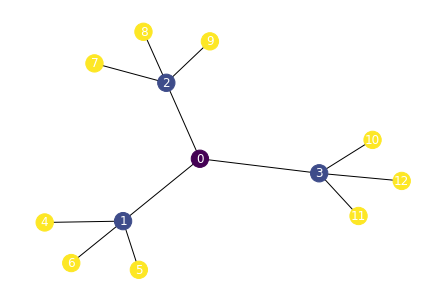

In [25]:
values = [GS5_test1.nodes[i]['weight'] for i in range(NS5_test1)]
nx.draw(GS5_test1, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')

**S6.** En gardant pour le moment J = 0.1, vérifier que les marginales prédites par le passage de
message sont bien égales à celles que l’on peut estimer avec les échantillons de Gibbs. Pour cela, faire
une figure qui comportera en abscisse les estimations faites par Gibbs et en ordonnée les estimations
faites par le passage de message. Vérifier que le point correspondant à chaque noeud se trouve sur la
diagonale x = y de la figure. Répéter la procédure pour un arbre régulier et sur un graphe avec nombre
d’enfants Poissonien, chacun avec au moins une centaine de noeuds. Rapporter les temps de calcul
nécessaire pour chacune des méthodes en utilisant le module time ou bien la commande magique
%timeit, commenter.

In [26]:
startS6_test1 = time.time()
DGS6_test1 = generateRegularDiTree(4,4)
LS6_test1 = lois_marginales_passage_de_noeuds(DGS6_test1,0.1)
NS6_test1 = DGS6_test1.number_of_nodes()
FS6_test1 = liste_feuille(DGS6_test1)
for i in range(NS6_test1):
    if i not in FS6_test1:
        DGS6_test1.nodes[i]['weight'] = 2*LS6_test1[i] - 1
    else :
        DGS6_test1.nodes[i]['weight']= 1
endS6_test1 = time.time()
time_message_regulier = endS6_test1 - startS6_test1

In [27]:
startS6_test2 = time.time()
GS6_test2 = generateRegularTree(4,4)
LS6_test2,TS6_test2 = partitionner(GS6_test2)  
GS6_test2 = echantillonageGibbsBis(GS6_test2,0.1,LS6_test2,TS6_test2)
NS6_test2 = GS6_test2.number_of_nodes()
ES6_test2 = [0 for l in range(NS6_test2)]
for k in range(100000):
    GS6_test2 = echantillonageGibbsBis(GS6_test2,0.1, LS6_test2, TS6_test2)
    for i in range(NS6_test2):
        ES6_test2[i]+= GS6_test2.nodes[i]['weight']
for i in range(NS6_test2):
        GS6_test2.nodes[i]['weight'] = ES6_test2[i]/100000
endS6_test2 = time.time()
time_Gibbs_regulier = endS6_test2 - startS6_test2

In [28]:
Gibbs = []
for i in range(NS6_test1):
        Gibbs.append(GS6_test2.nodes[i]['weight'])
Message = []
for i in range(NS6_test2):
        Message.append(DGS6_test1.nodes[i]['weight'])

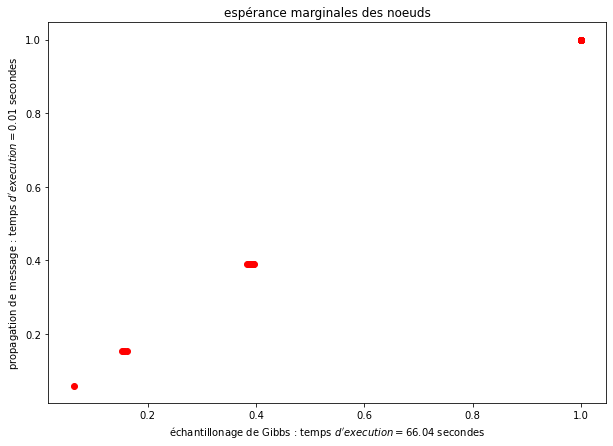

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(Gibbs, Message, color="red") 
plt.title("espérance marginales des noeuds")
plt.xlabel(f"échantillonage de Gibbs : temps $d'execution={round(time_Gibbs_regulier,2)}$ secondes") 
plt.ylabel(f"propagation de message : temps $d'execution={round(time_message_regulier,2)}$ secondes")
plt.show()

Les points sont bien alignés sur la droite d'équation y = x, les deux méthodes fournissent bien les mêmes resultats.

In [30]:
DGS6_test4 = generateRandomDiTree(3,4)
GS6_test3 = DGS6_test4.to_undirected()
startS6_test3 = time.time()
LS6_test3, TS6_test3 = partitionner(GS6_test3)  
GS6_test3 = echantillonageGibbsBis(GS6_test3,0.1,LS6_test3,TS6_test3)
NS6_test3 = GS6_test3.number_of_nodes()
ES6_test3 = [0 for l in range(NS6_test3)]
for k in range(10000):
    GS6_test3 = echantillonageGibbsBis(GS6_test3,0.1, LS6_test3, TS6_test3)
    for i in range(NS6_test3):
        ES6_test3[i]+= GS6_test3.nodes[i]['weight']
for i in range(NS6_test3):
        GS6_test3.nodes[i]['weight'] = ES6_test3[i]/10000
endS6_test3 = time.time()
time_Gibbs_aleatoire = endS6_test3 - startS6_test3

In [31]:
startS6_test4 = time.time()
LS6_test4 = lois_marginales_passage_de_noeuds(DGS6_test4,0.1)
NS6_test4 = DGS6_test4.number_of_nodes()
FS6_test4 = liste_feuille(DGS6_test4)
for i in range(NS6_test4):
    if i not in FS6_test4:
        DGS6_test4.nodes[i]['weight'] = 2*LS6_test4[i] - 1
    else :
        DGS6_test4.nodes[i]['weight']= 1
endS6_test4 = time.time()
time_message_aleatoire = endS6_test4 - startS6_test4

In [32]:
Gibbs = []
for i in range(NS6_test3):
        Gibbs.append(GS6_test3.nodes[i]['weight'])
Message = []
for i in range(NS6_test4):
        Message.append(DGS6_test4.nodes[i]['weight'])

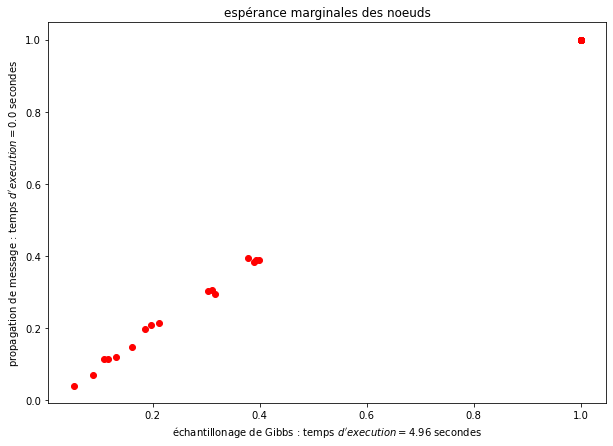

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(Gibbs, Message, color="red") 
plt.title("espérance marginales des noeuds")
plt.xlabel(f"échantillonage de Gibbs : temps $d'execution={round(time_Gibbs_aleatoire,2)}$ secondes") 
plt.ylabel(f"propagation de message : temps $d'execution={round(time_message_aleatoire,2)}$ secondes")
plt.show()

**S7.** En utilisant la méthode de votre choix, calculer les marginales pour J entre 0.01 et 10 (en utilisant
la function np.logspace de numpy pour faire varier J selon une échelle logarithmique) sur les mêmes
arbres qu’à la question précédente. On réfléchira à une visualisation adéquate. Commenter.

In [34]:
def lois_marginales_passage_de_noeuds_bis(G,J,X):
    """
    Entrée :
    Graphe G
    J : une liste de float représentant des paramètres des lois de passage de message
    X : liste des noeuds pour lesquels on calcule la loi marginale
    Résultat :
    L : liste donnant les valeurs des messages pour le noeud i pour chaque valeur du paramètre J
    """
    T = [[] for i in X]
    for j in J:
        MUP = passage_de_message(G,j)
        m_plus = 1
        m_moins = 1
        t = 0
        for i in X:
            for k in liste_successors(G,i):
                m_plus = m_plus*(math.exp(-j)+2*math.sinh(j)*MUP[k][i])
                m_moins = m_moins*(math.exp(j)+2*math.sinh(-j)*MUP[k][i])
            if liste_predecessors(G,i)!=[]:
                k = liste_predecessors(G,i)[0] 
                m_plus = m_plus*(math.exp(-j)+2*math.sinh(j)*MUP[k][i])
                m_moins = m_moins*(math.exp(j)+2*math.sinh(-j)*MUP[k][i]) 
            T[t].append(m_plus/(m_plus + m_moins))
            t = t + 1
    return(T)

In [35]:
GS7_test1 = generateRegularDiTree(3,6)

In [36]:
XS7_test1 = []
i = 0
while GS7_test1.nodes[i]['feuille'] == False :
    XS7_test1.append(i)
    i = liste_successors(GS7_test1,i)[0]


In [37]:
JS7_test1 = np.logspace(-2, 1,1000)

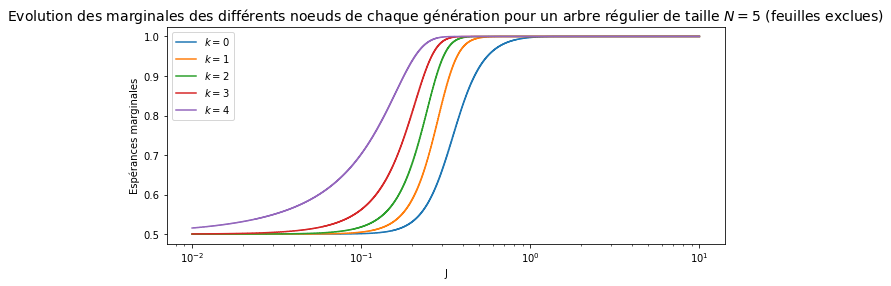

In [38]:
plt.figure(figsize =(10,4)) 
k=0
TS7_test1 = lois_marginales_passage_de_noeuds_bis(GS7_test1,JS7_test1,XS7_test1)
for i in range(len(XS7_test1)):
    LS7_test1 = TS7_test1[i]
    plt.step(JS7_test1, LS7_test1, where='post', label=f"$k={k}$") # on affiche avec step.
    k=k+1

plt.title(f"Evolution des marginales des différents noeuds de chaque génération pour un arbre régulier de taille $N={len(XS7_test1)}$ (feuilles exclues)", fontsize=14)
plt.legend(loc="best")
plt.xlabel(r"J")
plt.ylabel(r"Espérances marginales")
plt.xscale('log')
plt.show()

On remarque sur les courbes ci dessous que la variance des espérances marginales des noeuds est la plus forte pour J aux alentours de 0.1, quand J est trop petit ou trop grand tout les noeuds de l'arbre (feuilles exclus) deviennent equivalents. On remarque que J proche de 10 signifie que les feuilles influencent très fortement l'arbre et J proche de 0.01 signifie que les feuilles influencent beaucoup moins les autres noeuds

In [39]:
GS7_test2 = generateRandomDiTree(3,6)
XS7_test2 = []
i = 0
while GS7_test2.nodes[i]['feuille'] == False :
    XS7_test2.append(i)
    i = liste_successors(GS7_test2,i)[0]

In [40]:
TS7_test2 = lois_marginales_passage_de_noeuds_bis(GS7_test2,JS7_test1,XS7_test2)

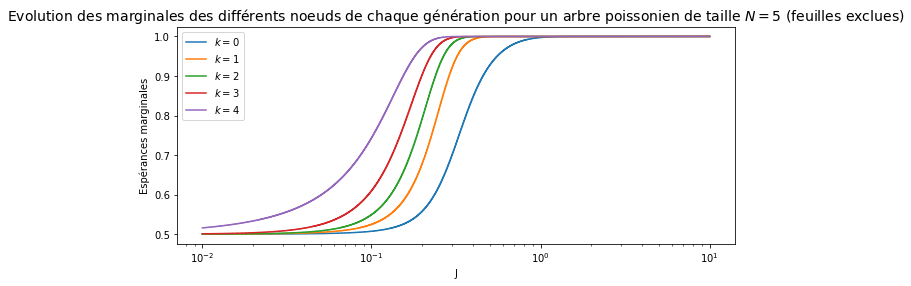

In [41]:
plt.figure(figsize =(10,4)) 
k = 0
for i in range(len(XS7_test2)):
    LS7_test2 = TS7_test2[i]
    plt.step(JS7_test1, LS7_test2, where='post', label=f"$k={k}$") # on affiche avec step.
    k=k+1

plt.title(f"Evolution des marginales des différents noeuds de chaque génération pour un arbre poissonien de taille $N={len(XS7_test2)}$ (feuilles exclues)", fontsize=14)
plt.legend(loc="best")
plt.xlabel(r"J")
plt.ylabel(r"Espérances marginales")
plt.xscale('log')
plt.show()